In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/metric_test.csv')
df

,pdv_codigo,codigo_barras_sku,mse_cant_vta_pred_sff_mean,rmse_cant_vta_pred_sff_mean,best_rmse,best_mse
0,1,78936683,4.417702e+08,21018.3,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
1,2,78936683,5.454090e+08,23354.0,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
2,3,78936683,5.111304e+08,22608.2,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
3,4,78936683,2.204388e+09,46950.9,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
4,5,78936683,3.282934e+08,18118.9,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
5,6,78936683,5.753588e+09,75852.4,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
6,7,78936683,1.358021e+08,11653.4,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
7,8,78936683,2.903742e+08,17040.4,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
8,9,78936683,4.386124e+08,20943.1,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
9,10,78936683,3.044407e+08,17448.2,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean


In [16]:
df.sort_values(by='rmse_cant_vta_pred_sff_mean', ascending=False)

,pdv_codigo,codigo_barras_sku,mse_cant_vta_pred_sff_mean,rmse_cant_vta_pred_sff_mean,best_rmse,best_mse
23,24,78936683,3.732496e+10,193196.7,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
19,20,78936683,1.367231e+10,116928.6,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
20,21,78936683,7.110545e+09,84324.1,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
5,6,78936683,5.753588e+09,75852.4,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
27,28,78936683,5.709462e+09,75561.0,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
18,19,78936683,5.050508e+09,71066.9,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
25,26,78936683,4.083166e+09,63899.7,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
3,4,78936683,2.204388e+09,46950.9,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
28,29,78936683,2.086392e+09,45677.0,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean
17,18,78936683,1.697018e+09,41194.9,rmse_cant_vta_pred_sff_mean,mse_cant_vta_pred_sff_mean


In [17]:
df['rmse_cant_vta_pred_sff_mean'].mean()

38842.51666666667

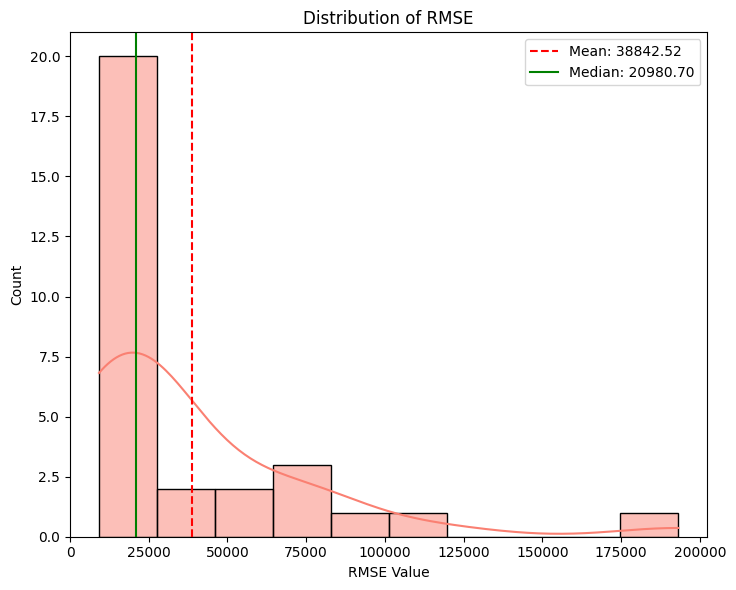

In [18]:
plt.figure(figsize=(14, 6))

# Plot for RMSE
plt.subplot(1, 2, 2)
sns.histplot(df['rmse_cant_vta_pred_sff_mean'], kde=True, color='salmon')
plt.title('Distribution of RMSE')
plt.xlabel('RMSE Value')

# Calculate and add mean/median lines for RMSE
rmse_mean = df['rmse_cant_vta_pred_sff_mean'].mean()
rmse_median = df['rmse_cant_vta_pred_sff_mean'].median()

plt.axvline(rmse_mean, color='red', linestyle='--', label=f'Mean: {rmse_mean:.2f}')
plt.axvline(rmse_median, color='green', linestyle='-', label=f'Median: {rmse_median:.2f}')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/metric_test_mean.csv')
df

,pdv_codigo,codigo_barras_sku,mse_cant_vta_pred_mean_pdv_sku,rmse_cant_vta_pred_mean_pdv_sku,best_rmse,best_mse
0,1,78936683,5.487235e+08,23424.8,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
1,2,78936683,5.712821e+08,23901.5,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
2,3,78936683,3.901272e+08,19751.6,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
3,4,78936683,2.509937e+09,50099.3,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
4,5,78936683,4.968427e+08,22290.0,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
5,6,78936683,6.545626e+09,80905.0,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
6,7,78936683,1.889030e+08,13744.2,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
7,8,78936683,3.672109e+08,19162.7,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
8,9,78936683,7.502774e+08,27391.2,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku
9,10,78936683,3.785635e+08,19456.7,rmse_cant_vta_pred_mean_pdv_sku,mse_cant_vta_pred_mean_pdv_sku


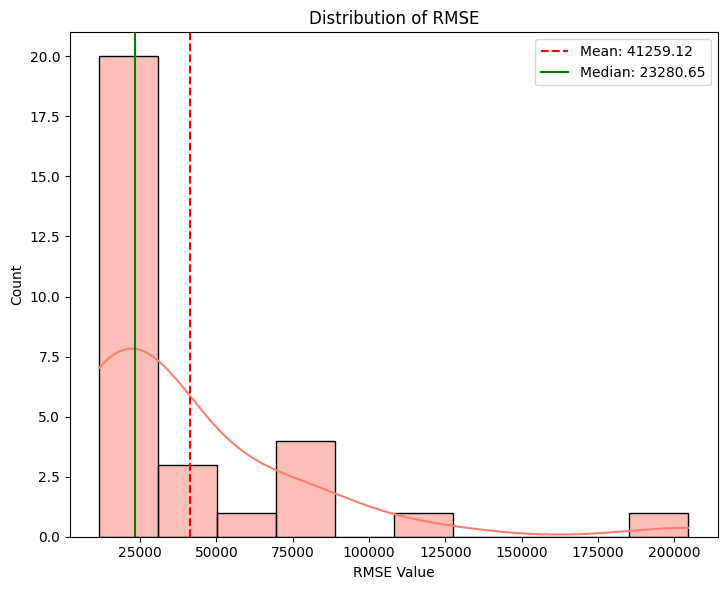

In [22]:
plt.figure(figsize=(14, 6))

# Plot for RMSE
plt.subplot(1, 2, 2)
sns.histplot(df['rmse_cant_vta_pred_mean_pdv_sku'], kde=True, color='salmon')
plt.title('Distribution of RMSE')
plt.xlabel('RMSE Value')

# Calculate and add mean/median lines for RMSE
rmse_mean = df['rmse_cant_vta_pred_mean_pdv_sku'].mean()
rmse_median = df['rmse_cant_vta_pred_mean_pdv_sku'].median()

plt.axvline(rmse_mean, color='red', linestyle='--', label=f'Mean: {rmse_mean:.2f}')
plt.axvline(rmse_median, color='green', linestyle='-', label=f'Median: {rmse_median:.2f}')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Mean

In [21]:
# 0,19 seg
mean = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_mean.csv')
print(mean['codigo_barras_sku'].nunique(), mean.shape, mean[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 0,34 seg
mean = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_mean.csv')
print(mean['codigo_barras_sku'].nunique(), mean.shape, mean[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 0,23 seg
mean = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_mean.csv')
print(mean['codigo_barras_sku'].nunique(), mean.shape, mean[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)


10 (63, 6) (63, 2)
10 (156, 6) (156, 2)
10 (88, 6) (88, 2)


# SFF

In [20]:
# 159 seg
sff = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_sff.csv')
print(sff['codigo_barras_sku'].nunique(), sff.shape, sff[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 159 seg
sff = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_sff.csv')
print(sff['codigo_barras_sku'].nunique(), sff.shape, sff[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 153 seg
sff = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_sff.csv')
print(sff['codigo_barras_sku'].nunique(), sff.shape, sff[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (63, 6) (63, 2)
10 (156, 6) (156, 2)
10 (88, 6) (88, 2)


# DeepAR

In [45]:
#  820 seg
deepar = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_deepar.csv')
print(deepar['codigo_barras_sku'].nunique(), deepar.shape, deepar[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

#  841 seg
deepar = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_deepar.csv')
print(deepar['codigo_barras_sku'].nunique(), deepar.shape, deepar[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

#  858 seg
deepar = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_deepar.csv')
print(deepar['codigo_barras_sku'].nunique(), deepar.shape, deepar[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (63, 8) (63, 2)
10 (156, 8) (156, 2)
10 (88, 8) (88, 2)


# TFT 

In [44]:
# 1303 seg
tft = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_tft.csv')
print(tft['codigo_barras_sku'].nunique(), tft.shape, tft[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 1306 seg
tft = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_tft.csv')
print(tft['codigo_barras_sku'].nunique(), tft.shape, tft[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 1279 seg
tft = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_tft.csv')
print(tft['codigo_barras_sku'].nunique(), tft.shape, tft[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (63, 6) (63, 2)
10 (156, 6) (156, 2)
10 (88, 6) (88, 2)


# wave net

In [43]:
# 2069 seg
wavenet = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_wavenet.csv')
print(wavenet['codigo_barras_sku'].nunique(), wavenet.shape, wavenet[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 2092 seg
wavenet = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_wavenet.csv')
print(wavenet['codigo_barras_sku'].nunique(), wavenet.shape, wavenet[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 1949 seg
wavenet = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_wavenet.csv')
print(wavenet['codigo_barras_sku'].nunique(), wavenet.shape, wavenet[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (63, 6) (63, 2)
10 (156, 6) (156, 2)
10 (88, 6) (88, 2)
